In [0]:
%run ../../shared

In [0]:
username = get_username()
notebook_path = get_notebook_path()
folder_path = get_folder_path()

print('username: "{}"'.format(username))
print('notebook_path: "{}"'.format(notebook_path))
print('folder_path: "{}"'.format(folder_path))

username: "yan.moiseev@databricks.com"
notebook_path: "/Shared/Bupa Workshop/Day 1/2. Building ML Models/1.0 Machine Learning"
folder_path: "/Shared/Bupa Workshop/Day 1/2. Building ML Models"

#0. Setup
First, let's prepare our environment:
- Create an MLFlow Experiment
- Load our data
- Separate it into test & train

In [0]:
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.pyfunc

import copy
import os

In [0]:
experiment_location = os.path.join('/', *folder_path.split('/')[:-2], 'cross-selling-insurance')

try:
  experiment_id = mlflow.create_experiment(experiment_location)
except Exception as e:
  experiment_id = mlflow.get_experiment_by_name(experiment_location).experiment_id
  
print(f'Experiment ID: "{experiment_id}"')
print(f'Experiment Location: "{experiment_location}"')

displayHTML(f"<h4>Check out the experiment at <a href='/#mlflow/experiments/{experiment_id}'>/#mlflow/experiments/{experiment_id}</a></h4>")

Check out the experiment at /#mlflow/experiments/1558031022667507

In [0]:
df = spark.sql('select * from {}'.format('claims.car_and_health_insurance_cross_sell')).toPandas()
display(df)

id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Claims_Amount,Claims_Num
1,Male,44,1,28.0,0,> 2 Years,Yes,2753.0181741645374,26.0,217,1,311,17
2,Male,76,1,3.0,0,1-2 Year,No,2282.227158965292,26.0,183,0,48,2
3,Male,47,1,28.0,0,> 2 Years,Yes,2606.0235813876698,26.0,27,1,507,33
4,Male,21,1,11.0,1,< 1 Year,No,1947.6103012412837,152.0,203,0,0,0
5,Female,29,1,41.0,1,< 1 Year,No,1871.1867236077549,152.0,39,0,435,9
6,Female,24,1,33.0,0,< 1 Year,Yes,178.97952731627856,160.0,176,0,0,0
7,Male,23,1,11.0,0,< 1 Year,Yes,1590.1956710264187,152.0,249,0,0,0
8,Female,56,1,28.0,0,1-2 Year,Yes,2179.807315386965,26.0,72,1,1224,32
9,Female,24,1,3.0,1,< 1 Year,No,1879.557249029771,152.0,28,0,180,7
10,Female,32,1,6.0,1,< 1 Year,No,1957.9543651774336,152.0,80,0,102,3


In [0]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=65)

print('Dataset sizes:')
print(f'\t->df_train size={df_train.shape[0]}')
print(f'\t->df_test size={df_test.shape[0]}')

Dataset sizes:
	->df_train size=304887
	->df_test size=76222

#1. Quick EDA

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pandas as pd

Looks like the most useful features to predict `Response` are:
- `Age`
- `Previously_Insured`
- `Policy_Sales_Channel`
- `Claimns_Amount`
- `Claims_Num`

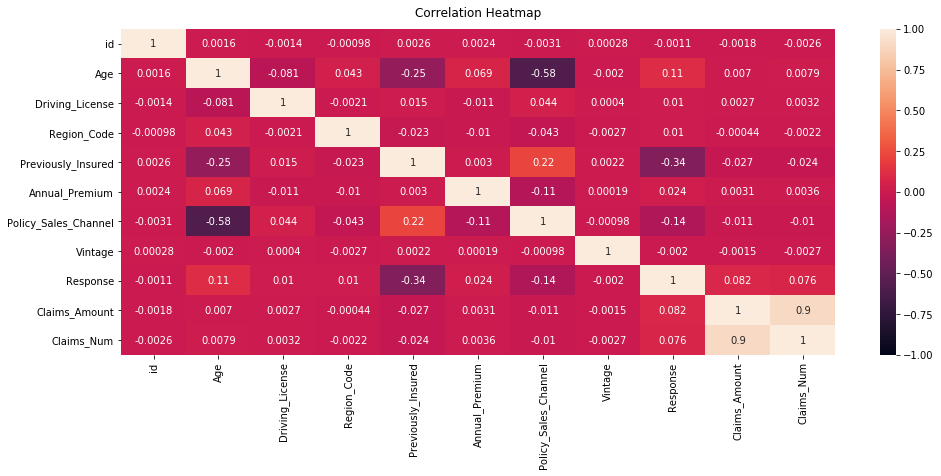

In [0]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

It looks like we are dealing with imbalanced dataset. `1` has 46.7k samples vs `0` 334.4k

In [0]:
display(df.groupby('Response').count()[['id']])

id
334399
46710


In [0]:
response_1 = df_train[df_train['Response'] == 1]
response_0 = df_train[df_train['Response'] == 0]

df_train_balanced = pd.concat([response_1, response_0.sample(response_1.shape[0])])

In [0]:
correlated_features = ['Age', 'Previously_Insured', 'Policy_Sales_Channel', 'Claims_Amount', 'Claims_Num']
dbutils.widgets.dropdown('correlated_features', correlated_features[0], correlated_features)

In [0]:
fig = px.histogram(df_train_balanced.sample(10000), x=dbutils.widgets.get('correlated_features'), marginal='box', color='Response')
fig.show()

# 2. Baseline Model

In [0]:
import pickle

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [0]:
import json
from mlflow.utils.file_utils import TempDir

In [0]:
class BaselineModel(mlflow.pyfunc.PythonModel):
  def __init__(self, random_forest_params={}, feature_columns=None):
    self._random_forest_params = random_forest_params
    self._feature_columns = feature_columns
  
  def fit(self, X, y):
    _X = copy.deepcopy(X)
    _X = _X[self._feature_columns]
    self._scaler = MinMaxScaler().fit(_X)
    _X = self._scaler.transform(_X)
    
    self._rf = RandomForestClassifier(**self._random_forest_params)
    self._rf.fit(_X, y)
    return self
      
  def predict(self, context, X):
    _y = self._predict(X)
    return _y 
    
  def _predict(self, X):
    _X = copy.deepcopy(X)
    _X = _X[self._feature_columns]
    _X = self._scaler.transform(_X)
    _y = self._rf.predict(_X)
    return _y
    
  def load_context(self, context):
    with open(context.artifacts['feature_cols'], 'rb') as f:
      self._feature_columns = json.load(f)
      
    with open(context.artifacts['scaler'], 'rb') as f:
      self._scaler = pickle.load(f)
    
    with open(context.artifacts['random_forest'], 'rb') as f:
      self._rf = pickle.load(f)
      
  def log_to_mlflow(self):
    with TempDir() as local_artifacts_dir:
      # dumping column names
      feature_cols_path = local_artifacts_dir.path('columns.json')
      with open(feature_cols_path, 'w') as m:
        json.dump(self._feature_columns, m)
      
      # dumping scaler
      scaler_path = local_artifacts_dir.path('scaler.pkl')
      with open(scaler_path, 'wb') as m:
        pickle.dump(self._scaler, m)
      
      # dumping model
      model_path = local_artifacts_dir.path('model.pkl')
      with open(model_path, 'wb') as m:
        pickle.dump(self._rf, m)
           
      # all of the model subcomponents will need to go here
      artifacts = {
        'feature_cols': feature_cols_path, 'scaler': scaler_path, 'random_forest': model_path
      }
      
      mlflow.pyfunc.log_model(
        artifact_path='model', python_model=self, artifacts=artifacts
      )

In [0]:
features = ['Age', 'Previously_Insured', 'Policy_Sales_Channel', 'Claims_Amount', 'Claims_Num']
label = 'Response'

X_train = df_train
y_train = df_train[label]

X_test = df_test
y_test = df_test[label]

with mlflow.start_run(experiment_id=experiment_id, run_name='baseline'):
  params = {'n_estimators': 200, 'max_depth': 5}
  print('Started run with params={}'.format(params))

  print('\ttraining on {} samples'.format(X_train.shape[0]))   
  model = BaselineModel(params, features).fit(X_train, y_train)
  print('\tdone training')
  
  print('\ttesting on {} samples'.format(X_test.shape[0]))
  y_pred_train = model._predict(X_train)
  y_pred_test = model._predict(X_test)
  print('\tdone inference')
  
  params = model._rf.get_params()
  mlflow.log_params(params)
  
  f1_train = f1_score(y_train, y_pred_train)
  print(f'\t-> f1_train={f1_train}')
  mlflow.log_metric('f1_train', f1_train)
  
  f1_test = f1_score(y_test, y_pred_test)
  print(f'\t-> f1_test={f1_test}')
  mlflow.log_metric('f1_test', f1_test)
  
  model.log_to_mlflow()

Started run with params={'n_estimators': 100, 'max_depth': 7}
	training on 304887 samples
	done training
	testing on 76222 samples
	done inference
	-> f1_train=0.067410612616716
	-> f1_test=0.06378040165506105

# 3. (Hopefully) better models

In [0]:
display(df_train)

id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Claims_Amount,Claims_Num,x_Gender,x_Vehicle_Age,x_Vehicle_Damage
359893,Male,32,1,35.0,1,< 1 Year,No,2749.819680710596,152.0,222,0,39,2,0,0,0
354862,Male,58,1,28.0,0,> 2 Years,Yes,1628.2373272126542,26.0,277,0,209,4,0,2,1
181208,Male,58,1,28.0,0,1-2 Year,Yes,4167.024493015349,26.0,168,1,5873,159,0,1,1
348839,Female,24,1,35.0,0,< 1 Year,Yes,2286.1742359935597,152.0,147,0,70,1,1,0,1
122025,Female,39,1,33.0,0,1-2 Year,Yes,178.97952731627856,156.0,265,0,113,3,1,1,1
336035,Female,27,1,36.0,0,1-2 Year,Yes,1841.3114336869007,124.0,294,0,231,9,1,1,1
9180,Male,63,1,28.0,0,1-2 Year,No,4212.620037997063,26.0,160,0,13,1,0,1,0
374258,Female,25,1,30.0,1,< 1 Year,No,2484.6849892945424,152.0,91,0,344,25,1,0,0
19173,Male,20,1,46.0,0,< 1 Year,Yes,2047.1038635745153,160.0,219,0,71,3,0,0,1
267117,Female,43,1,28.0,1,1-2 Year,No,1823.685693164119,29.0,294,0,149,3,1,1,0


In [0]:
def gender_encoder(df, use_prefix=False):
  _mapping = {'Male': 0, 'Female': 1}
  
  new_col = 'Gender'
  if use_prefix:
    new_col = 'x_Gender' 
    
  df[new_col] = df['Gender'].apply(lambda x: _mapping[x])
  return df
  
  
def vehicle_age_encoder(df, use_prefix=False):
  _mapping = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
  
  new_col = 'Vehicle_Age'
  if use_prefix:
    new_col = 'x_Vehicle_Age' 
    
  df[new_col] = df['Vehicle_Age'].apply(lambda x: _mapping[x])
  return df
  
  
def vehicle_damage_encoder(df, use_prefix=False):
  _mapping = {'No': 0, 'Yes': 1}
  
  new_col = 'Vehicle_Damage'
  if use_prefix:
    new_col = 'x_Vehicle_Damage' 
    
  df[new_col] = df['Vehicle_Damage'].apply(lambda x: _mapping[x])
  return df


funcs = [
  gender_encoder,
  vehicle_age_encoder,
  vehicle_damage_encoder,
]

for f in funcs:
  df_train = f(df_train, True)
  df_test = f(df_test, True)

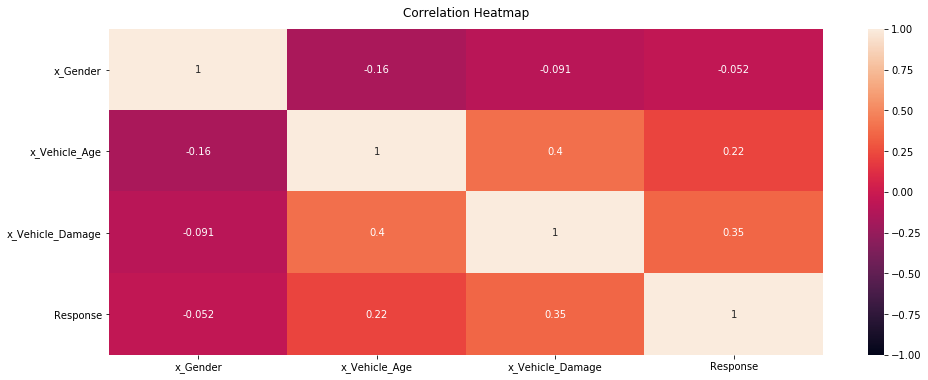

In [0]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_train[[c for c in df_train.columns if c.startswith('x')] + ['Response']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### 3.1 Getting new features out

In [0]:
features = [
  'Age', 
  'Previously_Insured',
  'Policy_Sales_Channel',
  'Claims_Amount',
  'Claims_Num',
  'Driving_License',
  'Region_Code',
  'Annual_Premium',
  'Vintage',
  'x_Gender',
  'x_Vehicle_Age',
  'x_Vehicle_Damage'
]

label = 'Response'

X_train = df_train[features]
y_train = df_train[label]

X_test = df_test[features]
y_test = df_test[label]

#### 3.2 Let's try XGboost

In [0]:
import xgboost as xgb

In [0]:
# Looks promising, let's keep experimenting

params = {
  'max_depth': 2, 'reg_alpha': 0.01, 'reg_lambda': 0.01
}

xgb_model = xgb.XGBClassifier(**params).fit(X=X_train, y=y_train)
y_pred = xgb_model.predict(X_test)

f1_test = f1_score(y_test, y_pred)
print(f1_test)

0.18935016445906305

In [0]:
params = {
  'max_depth': 2, 'reg_alpha': 0.01, 'reg_lambda': 0.01
}

xgb_model = xgb.XGBClassifier(**params).fit(X=X_train, y=y_train)
y_pred = xgb_model.predict(X_test)

f1_test = f1_score(y_test, y_pred)
print(f1_test)

0.18935016445906305

In [0]:
params = {
  'max_depth': 2, 'reg_alpha': 0.05, 'reg_lambda': 0.01
}

xgb_model = xgb.XGBClassifier(**params).fit(X=X_train, y=y_train)
y_pred = xgb_model.predict(X_test)

f1_test = f1_score(y_test, y_pred)
print(f1_test)

0.18729394992426265

#4. Hyper-parameter Search

Use HyperOpt with Spark trials to run distributed hyperparameters tuning across workers in parallel

![my_test_image](https://www.jeremyjordan.me/content/images/2017/11/grid_search.gif)
![my_test_image](https://www.jeremyjordan.me/content/images/2017/11/Bayesian_optimization.gif)

In [0]:
import copy
import cloudpickle as pickle

  
class XGBoostModel(mlflow.pyfunc.PythonModel):
  def __init__(self, xgb_params={}, feature_columns=None):
    self._xgb_params = xgb_params
    self._feature_columns = feature_columns
    
    self._transformations = [
      gender_encoder,
      vehicle_age_encoder,
      vehicle_damage_encoder
    ]
  
  def fit(self, X, y):
    _X = copy.deepcopy(X)
    for f in self._transformations:
      _X = f(_X)
      
    _X = _X[self._feature_columns]
    
    self._model = xgb.XGBClassifier(**self._xgb_params).fit(X=_X, y=y)
    return self
      
  def predict(self, context, X):
    _y = self._predict(X)
    return _y 
    
  def _predict(self, X):
    _X = copy.deepcopy(X)
    for f in self._transformations:
      _X = f(_X)
      
    _X = _X[self._feature_columns]
    
    _y = self._model.predict(_X)
    return _y
    
  def load_context(self, context):
    with open(context.artifacts['feature_cols'], 'rb') as f:
      self._feature_columns = json.load(f)
      
    with open(context.artifacts['transformations'], 'rb') as f:
      self._transformations = pickle.load(f)
    
    with open(context.artifacts['xgb'], 'rb') as f:
      self._model = pickle.load(f)
      
  def log_to_mlflow(self):
    with TempDir() as local_artifacts_dir:
      # dumping column names
      feature_cols_path = local_artifacts_dir.path('columns.json')
      with open(feature_cols_path, 'w') as m:
        json.dump(self._feature_columns, m)
      
      # dumping scaler
      transformations_path = local_artifacts_dir.path('transformations.pkl')
      with open(transformations_path, 'wb') as m:
        pickle.dump(self._transformations, m)
      
      # dumping model
      model_path = local_artifacts_dir.path('model.pkl')
      with open(model_path, 'wb') as m:
        pickle.dump(self._model, m)
           
      # all of the model subcomponents will need to go here
      artifacts = {
        'feature_cols': feature_cols_path, 'transformations': transformations_path, 'xgb': model_path
      }
      
      mlflow.pyfunc.log_model(
        artifact_path='model', python_model=self, artifacts=artifacts
      )

In [0]:
features = [
  'Age', 
  'Previously_Insured',
  'Policy_Sales_Channel',
  'Claims_Amount',
  'Claims_Num',
  'Driving_License',
  'Region_Code',
  'Annual_Premium',
  'Vintage',
  'Gender',
  'Vehicle_Age',
  'Vehicle_Damage'
]

In [0]:
X_train = df_train
y_train = df_train[label]

X_test = df_test
y_test = df_test[label]

In [0]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

fspace = {
    'max_depth': scope.int(hp.quniform('max_depth', 2, 11, q=1)),
    'reg_alpha': hp.uniform('reg_alpha', 0.001, 0.1),
    'reg_lambda': hp.uniform('reg_lambda', 0.001, 0.1), 
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 250, q=1))
}

def f(params):
  with mlflow.start_run(experiment_id=experiment_id, run_name='HyperOpt-XGBoost'):
    model = XGBoostModel(xgb_params=params, feature_columns=features).fit(X_train, y_train)
    model.log_to_mlflow()
    
    y_pred_test = model._predict(X_test)
    y_pred_train = model._predict(X_train)
    
    f1_test = f1_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    mlflow.log_metrics({'f1_train': f1_train, 'f1_test': f1_test})
    mlflow.log_params(model._model.get_params())
    
    return {'loss': -f1_test, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=f, space=fspace, algo=tpe.suggest, max_evals=20, trials=trials)

0%| | 0/20 [00:00<?, ?trial/s, best loss=?] 5%|▌ | 1/20 [00:35<11:17, 35.65s/trial, best loss: -0.29122302158273383]2020/11/01 06:19:49 ERROR mlflow.utils.rest_utils: API request to https://australiaeast.azuredatabricks.net/api/2.0/mlflow/runs/log-batch failed with code 503 != 200, retrying up to 2 more times. API response body: {"error_code":"TEMPORARILY_UNAVAILABLE","message":"Failed to update MLflow in linked AML workspace. POST request to /api/2.0/mlflow/runs/log-batch timed out due to inactivity after 3 seconds."}
 10%|█ | 2/20 [00:56<09:20, 31.13s/trial, best loss: -0.29122302158273383] 15%|█▌ | 3/20 [01:17<07:58, 28.17s/trial, best loss: -0.29122302158273383] 20%|██ | 4/20 [01:39<07:01, 26.37s/trial, best loss: -0.29122302158273383] 25%|██▌ | 5/20 [01:51<05:29, 21.94s/trial, best loss: -0.29122302158273383] 30%|███ | 6/20 [02:02<04:21, 18.65s/trial, best loss: -0.29122302158273383] 35%|███▌ | 7/20 [02:26<04:24, 20.36s/trial, best loss: -0.29122302158273383] 40%|████ | 8/20 [02:50<04:16, 21.38s/trial, best loss: -0.29122302158273383] 45%|████▌ | 9/20 [03:09<03:49, 20.85s/trial, best loss: -0.29122302158273383] 50%|█████ | 10/20 [03:17<02:48, 16.81s/trial, best loss: -0.29122302158273383] 55%|█████▌ | 11/20 [03:31<02:24, 16.08s/trial, best loss: -0.29122302158273383] 60%|██████ | 12/20 [03:43<01:58, 14.85s/trial, best loss: -0.29122302158273383] 65%|██████▌ | 13/20 [03:54<01:35, 13.62s/trial, best loss: -0.29122302158273383] 70%|███████ | 14/20 [04:10<01:25, 14.21s/trial, best loss: -0.29122302158273383] 75%|███████▌ | 15/20 [04:22<01:07, 13.54s/trial, best loss: -0.29122302158273383] 80%|████████ | 16/20 [04:35<00:54, 13.51s/trial, best loss: -0.29122302158273383] 85%|████████▌ | 17/20 [04:57<00:47, 15.98s/trial, best loss: -0.29122302158273383] 90%|█████████ | 18/20 [05:09<00:29, 14.96s/trial, best loss: -0.29122302158273383] 95%|█████████▌| 19/20 [05:17<00:12, 12.67s/trial, best loss: -0.29122302158273383]100%|██████████| 20/20 [05:32<00:00, 13.43s/trial, best loss: -0.29122302158273383]100%|██████████| 20/20 [05:32<00:00, 16.62s/trial, best loss: -0.29122302158273383]